In [2]:
# imports
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
#from pandas_profiling import ProfileReport
#import missingno as msno

# extract and load data properly

## build up fct elements

In [2]:
csv_path = './data/'

In [3]:
file_names = [x for x in os.listdir(csv_path) if ".csv" in x]
file_names

['EdStatsData.csv',
 'EdStatsCountry-Series.csv',
 'EdStatsSeries.csv',
 'EdStatsCountry.csv',
 'EdStatsFootNote.csv']

In [4]:
file_names = [x.removesuffix('.csv') for x in file_names]
file_names = [x.removeprefix('EdStats') for x in file_names]
file_names

['Data', 'Country-Series', 'Series', 'Country', 'FootNote']

In [5]:
# construct dict data

dataframe_list = [f'DataFrame{i}' for i, item in enumerate(file_names, start=1)]
dataframe_list

['DataFrame1', 'DataFrame2', 'DataFrame3', 'DataFrame4', 'DataFrame5']

In [6]:
data = dict(zip(file_names, dataframe_list))
data

{'Data': 'DataFrame1',
 'Country-Series': 'DataFrame2',
 'Series': 'DataFrame3',
 'Country': 'DataFrame4',
 'FootNote': 'DataFrame5'}

## summarize in a function

In [3]:
csv_path = './data/'

In [4]:
def get_data(csv_path):
    file_names = [x for x in os.listdir(csv_path) if ".csv" in x]
    # file_names_base = file_names
    key_names = [
        key_name.removesuffix('.csv').removeprefix('EdStats')
        for key_name in file_names
    ]

    data_dict = {}
    for k, f in zip(key_names, file_names):
        data_dict[k] = pd.read_csv(os.path.join(csv_path, f))

    return data_dict

In [5]:
data = get_data(csv_path)

# simple explo

## check dataset

### fct build 

In [6]:
ls -lh ./data

total 353M
-rw-r--r-- 1 mijka mijka 137K 22 janv.  2018 EdStatsCountry.csv
-rw-r--r-- 1 mijka mijka  48K 22 janv.  2018 EdStatsCountry-Series.csv
-rw-r--r-- 1 mijka mijka 312M 22 janv.  2018 EdStatsData.csv
-rw-r--r-- 1 mijka mijka  38M 22 janv.  2018 EdStatsFootNote.csv
-rw-r--r-- 1 mijka mijka 3,6M 22 janv.  2018 EdStatsSeries.csv


In [61]:
import enum
from os import listdir
from os.path import isfile, join

class SIZE_UNIT(enum.Enum):
   BYTES = 1
   KB = 2
   MB = 3
   GB = 4

def convert_unit(size_in_bytes, unit):
  # Convert the size from bytes to other units like KB, MB or GB
   if unit == SIZE_UNIT.KB:
       return size_in_bytes/1024
   elif unit == SIZE_UNIT.MB:
       return size_in_bytes/(1024*1024)
   elif unit == SIZE_UNIT.GB:
       return size_in_bytes/(1024*1024*1024)
   else:
       return size_in_bytes

def get_file_size(file_name, size_type = SIZE_UNIT.BYTES ):
   # Get file in size in given unit like KB, MB or GB
   size = os.path.getsize(file_name)
   return convert_unit(size, size_type)

def get_folder_files_size(folder_path):
    files_list = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]
    for i in files_list:
        size = get_file_size(f'{folder_path + i}', SIZE_UNIT.MB)
        print(f'Size of {i}: ', round(size,2),'MB')

In [9]:
def get_shape(dict):
    for key in dict:
        print(key, dict[f'{key}'].shape)

### Use explore fct

In [7]:
data.keys()

dict_keys(['Data', 'Country-Series', 'Series', 'Country', 'FootNote'])

In [8]:
data['Data'].nunique()

Country Name        242
Country Code        242
Indicator Name     3665
Indicator Code     3665
1970              24595
                  ...  
2085               7335
2090               7150
2095               7044
2100               6914
Unnamed: 69           0
Length: 70, dtype: int64

In [59]:
get_folder_files_size(csv_path)

Size of EdStatsData.csv:  311.3 MB
Size of EdStatsCountry-Series.csv:  0.05 MB
Size of EdStatsSeries.csv:  3.54 MB
Size of EdStatsCountry.csv:  0.13 MB
Size of EdStatsFootNote.csv:  37.87 MB


In [10]:
get_shape(data)

Data (886930, 70)
Country-Series (613, 4)
Series (3665, 21)
Country (241, 32)
FootNote (643638, 5)


In [51]:
data['Country-Series']

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [ ]:
# taux de remplissage par champ

## cardinality

In [12]:
country2 = data['Country'][['Country Code','Short Name','Income Group']]

In [13]:
# find distribution of different "Income Group"
country2.groupby(['Income Group']).count()

,Country Code,Short Name
Income Group,,
High income: OECD,31,31
High income: nonOECD,44,44
Low income,34,34
Lower middle income,50,50
Upper middle income,55,55


In [38]:
country2.head()

,Country Code,Short Name,Income Group
0,ABW,Aruba,High income: nonOECD
1,AFG,Afghanistan,Low income
2,AGO,Angola,Upper middle income
3,ALB,Albania,Upper middle income
4,AND,Andorra,High income: nonOECD


In [14]:
data['Data'].head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data['Data'].columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

### tests

In [18]:
maindata = data['Data'][['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']]
maindata

,Country Name,Country Code,Indicator Name,Indicator Code
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR
...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS


In [19]:
maindata.iloc[1,:]

Country Name                                             Arab World
Country Code                                                    ARB
Indicator Name    Adjusted net enrolment rate, lower secondary, ...
Indicator Code                                         UIS.NERA.2.F
Name: 1, dtype: object

In [20]:
maindata.duplicated().sum()

0

In [21]:
data['Data'].duplicated().sum()

0

In [22]:
#data[list(data.keys())[0]]
data['Data']

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data['Data'].isnull().count()

Country Name      886930
Country Code      886930
Indicator Name    886930
Indicator Code    886930
1970              886930
                   ...  
2085              886930
2090              886930
2095              886930
2100              886930
Unnamed: 69       886930
Length: 70, dtype: int64

In [24]:
data['Data'].count()

Country Name      886930
Country Code      886930
Indicator Name    886930
Indicator Code    886930
1970               72288
                   ...  
2085               51436
2090               51436
2095               51436
2100               51436
Unnamed: 69            0
Length: 70, dtype: int64

In [25]:
minor = data['Data'][['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100']]

In [26]:
preds = data['Data'][['Country Name', 'Country Code', 'Indicator Code','2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100']]

In [27]:
preds

,Country Name,Country Code,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
preds.dropna().count()

Country Name      51436
Country Code      51436
Indicator Code    51436
2020              51436
2025              51436
2030              51436
2035              51436
2040              51436
2045              51436
2050              51436
2055              51436
2060              51436
2065              51436
2070              51436
2075              51436
2080              51436
2085              51436
2090              51436
2095              51436
2100              51436
dtype: int64

In [29]:
# variables ayant des valeurs manquantes
preds_na = preds.isnull().sum()
preds_na[preds_na>0]

2020    835494
2025    835494
2030    835494
2035    835494
2040    835494
2045    835494
2050    835494
2055    835494
2060    835494
2065    835494
2070    835494
2075    835494
2080    835494
2085    835494
2090    835494
2095    835494
2100    835494
dtype: int64

## TODO : take 1 value per country per indicator

## explo work

In [30]:
# select all rows with column 'Indicator Code' with value 'UIS.XGDP.56.FSGOV' 
#(Government expenditure on education as % of GDP (%))

XGDP_Data = data['Data'].loc[data['Data']['Indicator Code'] == 'UIS.XGDP.56.FSGOV']
XGDP_Data

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1266,Arab World,ARB,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4931,East Asia & Pacific,EAS,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8596,East Asia & Pacific (excluding high income),EAP,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12261,Euro area,EMU,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15926,Europe & Central Asia,ECS,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869871,Virgin Islands (U.S.),VIR,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873536,West Bank and Gaza,PSE,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877201,"Yemen, Rep.",YEM,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880866,Zambia,ZMB,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# check if all country codes are different

XGDP_Data['Country Code'].duplicated().sum()

0

## fct build

In [32]:
## fonction de transformation

def select_column_val(df, col, val):
    df_select = df.loc[df[col] == val]
    return df_select


In [33]:
data_XGDP = select_column_val(data['Data'],'Indicator Code','UIS.XGDP.56.FSGOV')
data_XGDP

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1266,Arab World,ARB,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4931,East Asia & Pacific,EAS,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8596,East Asia & Pacific (excluding high income),EAP,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12261,Euro area,EMU,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15926,Europe & Central Asia,ECS,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869871,Virgin Islands (U.S.),VIR,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873536,West Bank and Gaza,PSE,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877201,"Yemen, Rep.",YEM,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880866,Zambia,ZMB,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# sur data_XGDP, compter le nombre de données présentes / absentes sans prendre en compte pays

In [34]:
#create df with only 'years' columns
data_XGDP_years = data_XGDP.loc[:, ~data_XGDP.columns.isin(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])]
data_XGDP_years.shape

(242, 66)

In [35]:
#### calcule % of missing values within 'years' columns
percent_missing = data_XGDP_years.isnull().sum() * 100 / len(data_XGDP_years)

#create df listing df column names with missing values % 
missing_values_df = pd.DataFrame({'column_name':data_XGDP_years.columns,
                                  'percent_missing': percent_missing
                                 })
#
missing_values_df[missing_values_df.percent_missing !=100]

,column_name,percent_missing
1998,1998,76.033058
1999,1999,70.661157
2000,2000,71.074380
2001,2001,67.768595
2002,2002,63.223140
2003,2003,71.487603
2004,2004,61.570248
2005,2005,64.462810
2006,2006,63.636364
2007,2007,63.636364


In [36]:
data['Data'].describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [65]:
data['Data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

## Assess available / missing data in whole dataframe

### create function

In [69]:
# list unique indicators
indicators_list = data['Data']['Indicator Code'].unique()
indicators_list

array(['UIS.NERA.2', 'UIS.NERA.2.F', 'UIS.NERA.2.GPI', ...,
       'SE.ADT.1524.LT.FE.ZS', 'SE.ADT.1524.LT.FM.ZS',
       'SE.ADT.1524.LT.MA.ZS'], dtype=object)

In [78]:
#create df with only 'years' columns from first indicator in the list
indicator_full_data = data['Data'].loc[data['Data']['Indicator Code'] == indicators_list[0]]
indicator_years_data = indicator_full_data.loc[:, ~indicator_full_data.columns.isin(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])]

In [88]:
df_nan_count = indicator_years_data.isna().values.sum()
df_nan_count

13567

In [89]:
df_non_nan_count = indicator_years_data.count().sum()
df_non_nan_count

2405

In [93]:
# percent of non-nan values 
available_values_percent = round((df_non_nan_count / (df_non_nan_count + df_nan_count) * 100), 2)
available_values_percent

15.06

In [137]:
for i in range(len(indicators_list)):
        print(indicators_list[i])
        

    

UIS.NERA.2
UIS.NERA.2.F
UIS.NERA.2.GPI
UIS.NERA.2.M
SE.PRM.TENR
SE.PRM.TENR.FE
UIS.NERA.1.GPI
SE.PRM.TENR.MA
UIS.NERA.3
UIS.NERA.3.F
UIS.NERA.3.GPI
UIS.NERA.3.M
UIS.NIRA.1
UIS.NIRA.1.F
UIS.NIRA.1.GPI
UIS.NIRA.1.M
UIS.LPP.AG15T99
UIS.LP.AG15T99
UIS.LP.AG15T99.F
UIS.LP.AG15T99.M
SE.ADT.LITR.ZS
SE.ADT.LITR.FE.ZS
UIS.LR.AG15T99.GPI
SE.ADT.LITR.MA.ZS
UIS.AFR.AGRADMG.1.PU
UIS.AFR.PBR.1.G1.PU.MATH
UIS.AFR.PBR.1.G2.PU.MATH
UIS.AFR.PBR.1.G3.PU.MATH
UIS.AFR.PBR.1.G4.PU.MATH
UIS.AFR.PBR.1.G5.PU.MATH
UIS.AFR.PBR.1.G6.PU.MATH
UIS.AFR.PBR.1.G7.PU.MATH
UIS.AFR.PBR.1.PU.MATH
UIS.AFR.PBR.1.G1.PU.READ
UIS.AFR.PBR.1.G2.PU.READ
UIS.AFR.PBR.1.G3.PU.READ
UIS.AFR.PBR.1.G4.PU.READ
UIS.AFR.PBR.1.G5.PU.READ
UIS.AFR.PBR.1.G6.PU.READ
UIS.AFR.PBR.1.G7.PU.READ
UIS.AFR.PBR.1.PU.READ
UIS.AFR.CS.1.PU
UIS.AFR.CS.MG.1.PU
UIS.AFR.CS.SG.1.G1.PU
UIS.AFR.CS.SG.1.G2.PU
UIS.AFR.CS.SG.1.G3.PU
UIS.AFR.CS.SG.1.G4.PU
UIS.AFR.CS.SG.1.G5.PU
UIS.AFR.CS.SG.1.G6.PU
UIS.AFR.CS.SG.1.G7.PU
UIS.AFR.CS.SG.1.PU
UIS.AFR.GTC.2.T
UIS.AFR.GTC.2

PRJ.ATT.2039.2.FE
PRJ.ATT.2039.2.MA
PRJ.ATT.2039.2.MF
PRJ.ATT.2039.NED.FE
PRJ.ATT.2039.NED.MA
PRJ.ATT.2039.NED.MF
PRJ.ATT.2039.4.FE
PRJ.ATT.2039.4.MA
PRJ.ATT.2039.4.MF
PRJ.ATT.2039.1.FE
PRJ.ATT.2039.1.MA
PRJ.ATT.2039.1.MF
PRJ.ATT.2039.3.FE
PRJ.ATT.2039.3.MA
PRJ.ATT.2039.3.MF
PRJ.ATT.2064.S1.FE
PRJ.ATT.2064.S1.MA
PRJ.ATT.2064.S1.MF
PRJ.ATT.2064.2.FE
PRJ.ATT.2064.2.MA
PRJ.ATT.2064.2.MF
PRJ.ATT.2064.NED.FE
PRJ.ATT.2064.NED.MA
PRJ.ATT.2064.NED.MF
PRJ.ATT.2064.4.FE
PRJ.ATT.2064.4.MA
PRJ.ATT.2064.4.MF
PRJ.ATT.2064.1.FE
PRJ.ATT.2064.1.MA
PRJ.ATT.2064.1.MF
PRJ.ATT.2064.3.FE
PRJ.ATT.2064.3.MA
PRJ.ATT.2064.3.MF
PRJ.ATT.25UP.S1.FE
PRJ.ATT.25UP.S1.MA
PRJ.ATT.25UP.S1.MF
PRJ.ATT.25UP.2.FE
PRJ.ATT.25UP.2.MA
PRJ.ATT.25UP.2.MF
PRJ.ATT.25UP.NED.FE
PRJ.ATT.25UP.NED.MA
PRJ.ATT.25UP.NED.MF
PRJ.ATT.25UP.4.FE
PRJ.ATT.25UP.4.MA
PRJ.ATT.25UP.4.MF
PRJ.ATT.25UP.1.FE
PRJ.ATT.25UP.1.MA
PRJ.ATT.25UP.1.MF
PRJ.ATT.25UP.3.FE
PRJ.ATT.25UP.3.MA
PRJ.ATT.25UP.3.MF
PRJ.ATT.2529.S1.FE
PRJ.ATT.2529.S1.MA
PRJ.ATT.2529.S1.MF
P

In [136]:
# Python program to print list
# using for loop
a = [1, 2, 3, 4, 5]
  
# printing the list using loop
for x in range(len(a)):
    print(a[x])

1
2
3
4
5


In [138]:
# refactor in a function to assess from whole dataframe

def get_df_avalaible_values(df):
    indicators_list = df['Indicator Code'].unique()
    available_values_list = []
    
    for i in range(len(indicators_list)):
        indicator_full_data = df.loc[df['Indicator Code'] == indicators_list[i]]
        indicator_years_data = indicator_full_data.loc[:, ~indicator_full_data.columns.isin(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])]
        df_nan_count = indicator_years_data.isna().values.sum()
        df_non_nan_count = indicator_years_data.count().sum()
        available_values_percent = round((df_non_nan_count / (df_non_nan_count + df_nan_count) * 100), 2)
        available_values_list.append(available_values_percent)
        
    
    available_values_df = pd.DataFrame({'Indicator Code':indicators_list,
                                  'percent_available': available_values_list
                                 })   
    return available_values_df


### get results

In [139]:
result = get_df_avalaible_values(data['Data'])
result

,Indicator Code,percent_available
0,UIS.NERA.2,15.06
1,UIS.NERA.2.F,14.15
2,UIS.NERA.2.GPI,14.07
3,UIS.NERA.2.M,14.07
4,SE.PRM.TENR,20.14
...,...,...
3660,UIS.LP.AG15T24.M,6.66
3661,SE.ADT.1524.LT.ZS,8.13
3662,SE.ADT.1524.LT.FE.ZS,8.12
3663,SE.ADT.1524.LT.FM.ZS,8.12


### plotting results

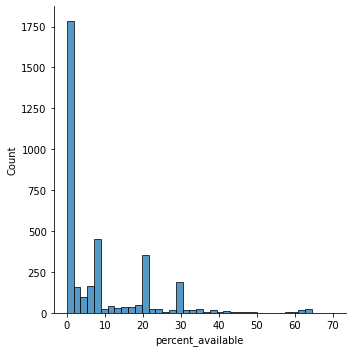

In [144]:
ax = sns.displot(result['percent_available'])

<AxesSubplot:xlabel='Count', ylabel='percent_available'>

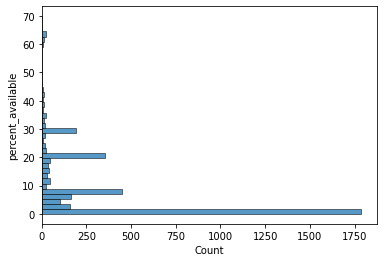

In [147]:
sns.histplot(data=result, y="percent_available")

In [153]:
result.head()

,Indicator Code,percent_available
0,UIS.NERA.2,15.06
1,UIS.NERA.2.F,14.15
2,UIS.NERA.2.GPI,14.07
3,UIS.NERA.2.M,14.07
4,SE.PRM.TENR,20.14


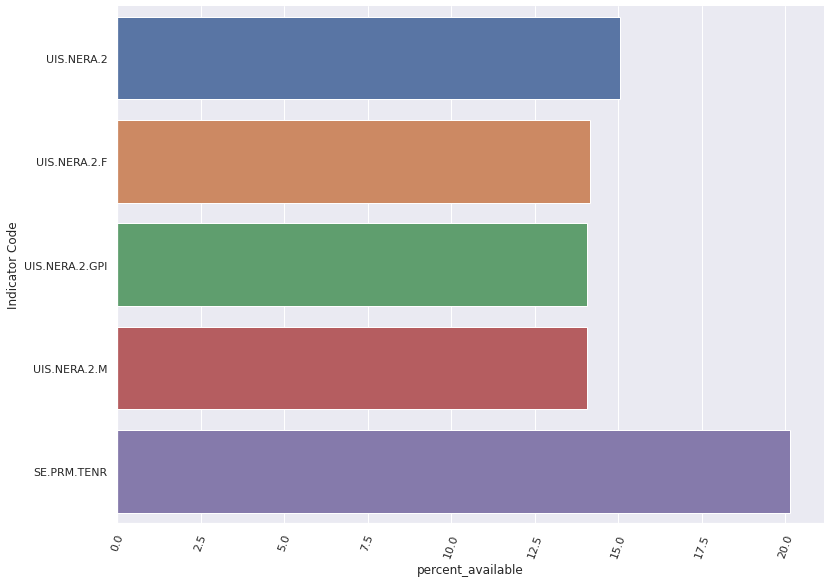

In [162]:
sns.catplot(data=result.head(), y="Indicator Code", x="percent_available", kind="bar", height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=70)
plt.tight_layout()

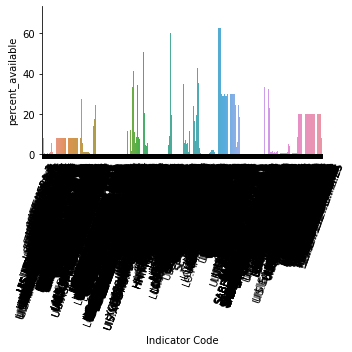

In [154]:
sns.catplot(data=result, x="Indicator Code", y="percent_available", kind="bar")
plt.xticks(rotation=70)
plt.tight_layout()

In [166]:
# take top 200 results from dataframe and plot them

top_200_results = result.sort_values(by='percent_available',ascending=False).head(200)
top_200_results

,Indicator Code,percent_available
2533,SP.POP.TOTL,69.84
2307,SP.POP.GROW,69.80
2483,SP.POP.1564.TO.ZS,64.13
2532,SP.POP.TOTL.MA.ZS,64.07
2530,SP.POP.TOTL.FE.ZS,64.07
...,...,...
2502,SP.POP.0610.FE.UN,29.98
2375,SP.POP.AG19.MA.UN,29.98
2478,SP.POP.1419.MA.UN,29.98
2481,SP.POP.1524.MA.UN,29.98


In [167]:
top_200_results

,Indicator Code,percent_available
2533,SP.POP.TOTL,69.84
2307,SP.POP.GROW,69.80
2483,SP.POP.1564.TO.ZS,64.13
2532,SP.POP.TOTL.MA.ZS,64.07
2530,SP.POP.TOTL.FE.ZS,64.07
...,...,...
2502,SP.POP.0610.FE.UN,29.98
2375,SP.POP.AG19.MA.UN,29.98
2478,SP.POP.1419.MA.UN,29.98
2481,SP.POP.1524.MA.UN,29.98


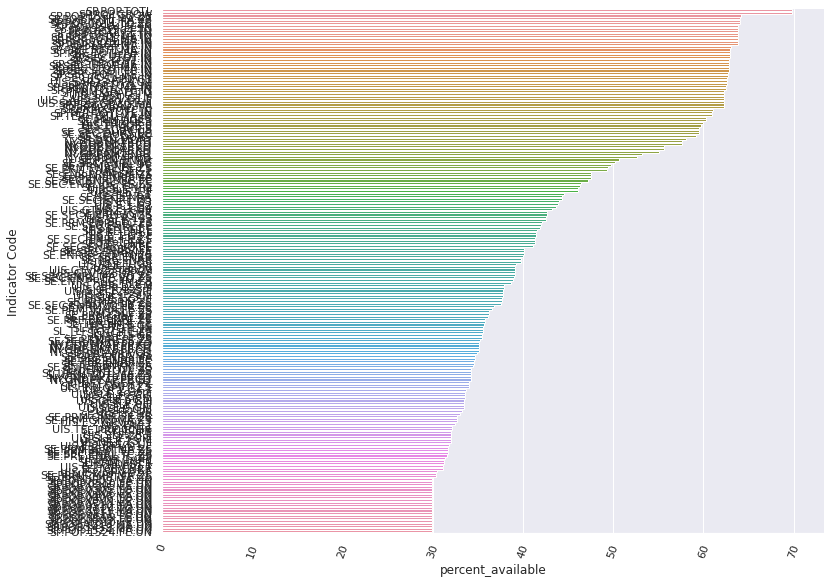

In [170]:
# plot top_200_results

sns.catplot(data=top_200_results, y="Indicator Code", x="percent_available", kind="bar", height=8.27, aspect=11.7/8.27)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=70)
plt.tight_layout()

In [ ]:
## sélectionner top 10

## pour chacune des variables, regarder la distribution des valeurs (violin chart)
## => regarder si il y a des valeurs spécifiques (distribution extreme ou non, etc)

## regarder si certaines sont corrélées : étude de corrélation, matrice de corrélation

## essayer de déterminer pays/endroits où la tendance n'a pas été à 
##        la hausse mais que des indicateurs diraient que cela pourrait aller à la hausse


## faire infos type "describe()" sur les kpi

## plotter en violin


## (ACP) / PCA https://www.google.com/search?q=pca+data


In [172]:
data['Data'].describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN
